# Machine Learning - Tarea 3
---

---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [40]:
import numpy as np
import pandas as pd
import seaborn as sbrn

from matplotlib import pyplot as plt

from sklearn import utils as skut
from sklearn import model_selection as skms
from sklearn import tree as sktr
from sklearn import decomposition as skdc
from sklearn import preprocessing as skpp
from sklearn import svm as sksvm
from sklearn import model_selection as skms
from sklearn import ensemble as skens
from sklearn import metrics as skmt
from sklearn import discriminant_analysis as skda

from keras import models as krms
from keras import layers as krly
from keras import optimizers as kropt
from keras.utils import np_utils as krnpu

In [60]:
def loading(curr, total):
    loading_string = '['+'='*curr+'>'+' '*(total-1-curr)+'] {:>3d}%'.format(int((curr+1)*100/total))
    loading_string = '\r'*len(loading_string) + loading_string
    print(loading_string, end='')

---

---
## 1.- Small circle inside Large circle

---
### 1.a

#### Generación de Datos

In [31]:
def do_circles(n=2000,noisy_n=0.05):
    generator = skut.check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    
    X = np.vstack((
        np.append(outer_circ_x, inner_circ_x),
        np.append(outer_circ_y, inner_circ_y)
    )).T
    
    y = np.hstack([
        np.zeros(n // 2, dtype=np.intp),
        np.ones(n // 2, dtype=np.intp)
    ])
    
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.5, random_state=42)
    
    return X_train, y_train, X_test, y_test

In [32]:
def plot_classifier(clf, X_train, Y_train, X_test, Y_test, model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(12, 8))
    axis.scatter(X_train[:,0], X_train[:,1], s=30, c=Y_train, zorder=10, cmap='cool')
    axis.scatter(X_test[:,0], X_test[:,1], s=20, c=Y_test, zorder=10, cmap='winter')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else:
        raise ValueError('model type not supported')
        
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0.5
    axis.pcolormesh(XX, YY, Zplot, cmap='YlGn')
    axis.contour(XX, YY, Zplot, alpha=1, colors=["r"], linestyles=["-"], levels=[0.5])
    plt.show()

---
#### Datos:

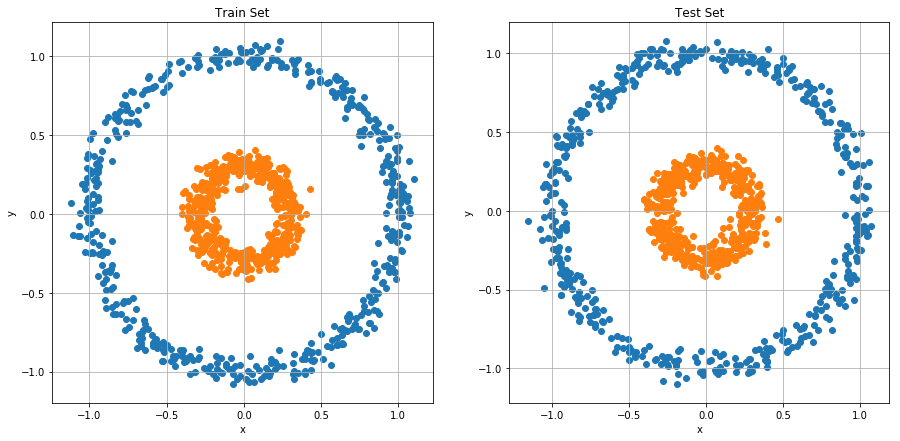

In [33]:
X_train, y_train, X_test, y_test = do_circles()

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
ax1.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1])
ax1.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1])
ax1.set_title("Train Set")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1])
ax2.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1])
ax2.set_title("Test Set")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid()
plt.show()

---
### 1.b

#### Red con una sola neurona

In [34]:
n_h=1
model = krms.Sequential()
model.add(krly.Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(krly.Dense(n_h, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

1000/1000 [==============================] - 0s 34us/step


In [35]:
print("Accuracy over Test Set: {:>.3}".format(test_acc))

Accuracy over Test Set: 0.507


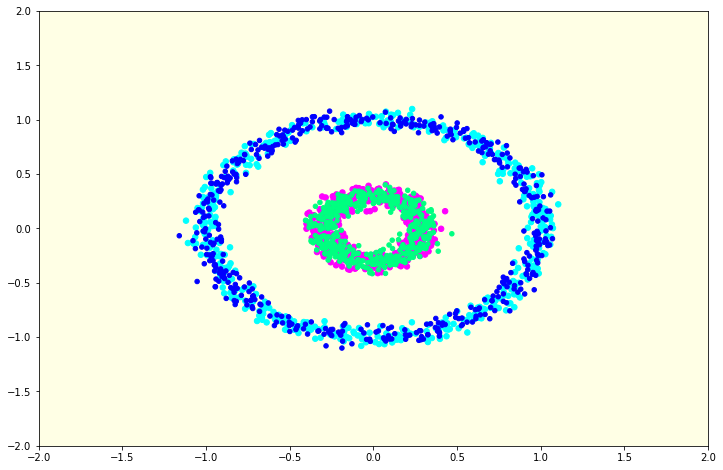

In [36]:
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann')

---
#### Cambiando la función de activación:

In [29]:
n_h=1
model = krms.Sequential()
model.add(krly.Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='tanh'))
model.add(krly.Dense(n_h, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

NameError: name 'X_train' is not defined

In [41]:
print("Accuracy over Test Set: {:>.3}".format(test_acc))

Accuracy over Test Set: 0.667


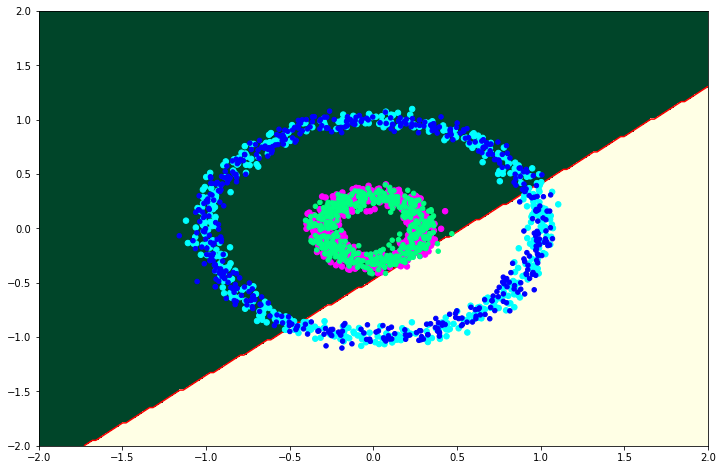

In [42]:
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann')

---
### 1.c

#### Red con una _Hidden Layer_, dos neuronas.

In [43]:
n_h=2
model = krms.Sequential()
model.add(krly.Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(krly.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

1000/1000 [==============================] - 0s 108us/step


In [44]:
print(test_acc)

0.869


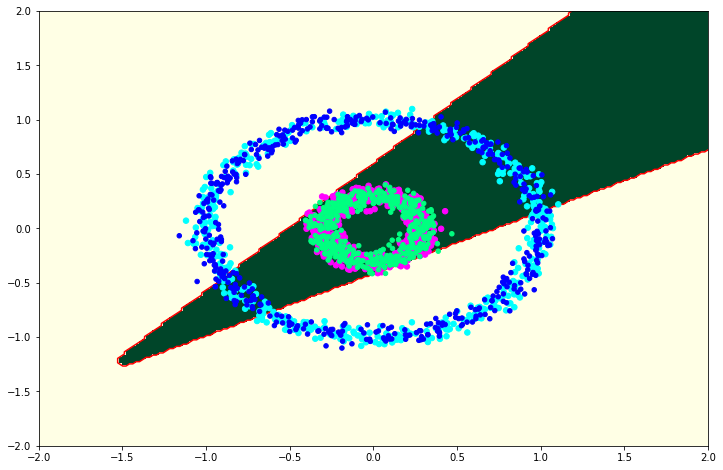

In [45]:
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann')

---
#### Red con una _Hidden Layer_, 3 neuronas.

In [46]:
n_h=3
model = krms.Sequential()
model.add(krly.Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(krly.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

1000/1000 [==============================] - 0s 160us/step


In [47]:
print(test_acc)

1.0


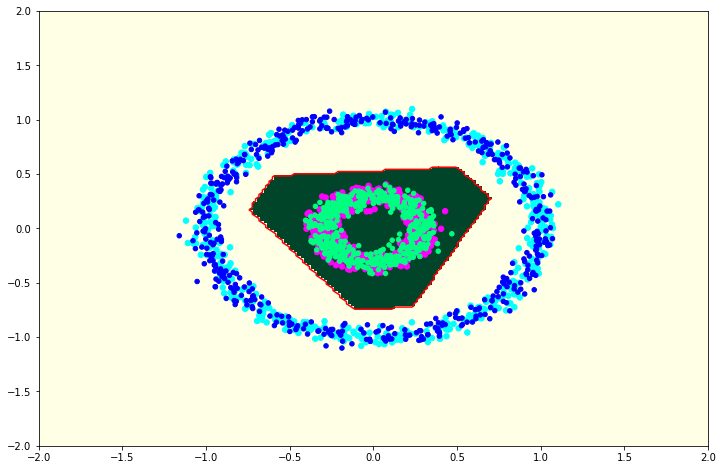

In [48]:
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann')

---
#### Error

In [49]:
errors = []

for n_h in  2 ** np.arange(1,6):
    model = krms.Sequential()
    model.add(krly.Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(krly.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=kropt.SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
    score = model.evaluate(X_test, y_test)
    errors.append(score[0])

1000/1000 [==============================] - 0s 148us/step


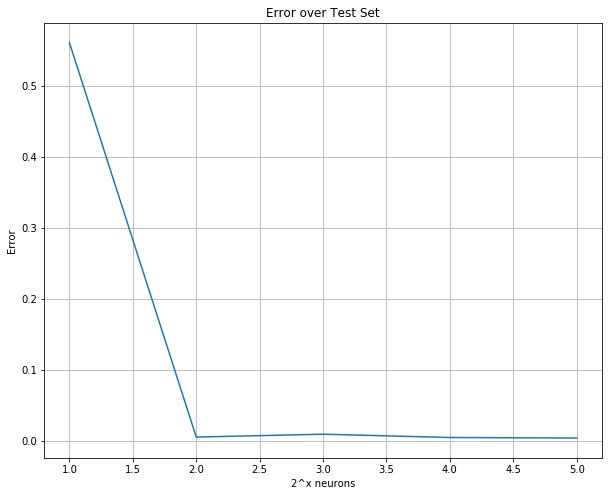

In [51]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(range(1, len(errors) + 1), errors)
ax.set_title("Error over Test Set")
ax.set_ylabel("Error")
ax.set_xlabel("2^x neurons")
ax.grid()
plt.show()

---
### 1.d

#### _Stump_

Test Accuracy = 0.67
Max depth = 1


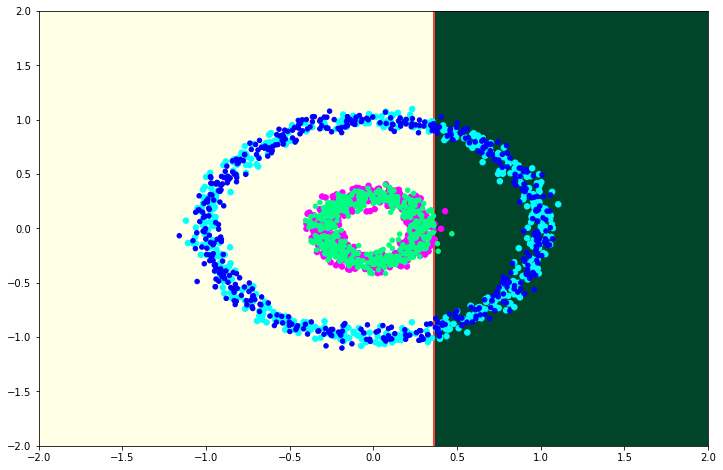

In [54]:
clf = sktr.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree')

---
#### Otro intento:

Test Accuracy = 0.679
Max depth = 1


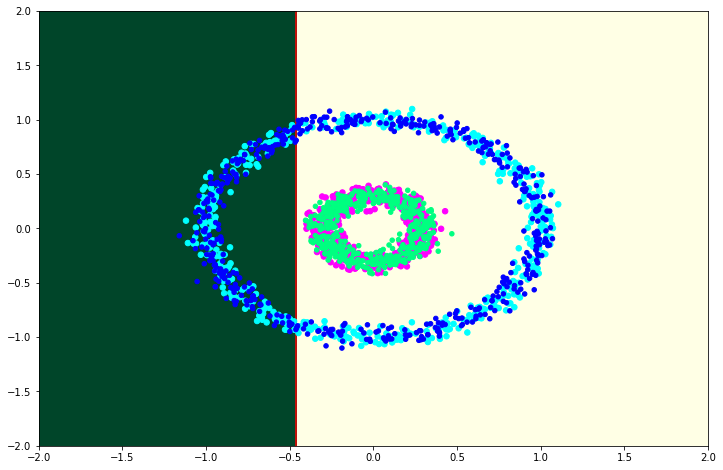

In [57]:
clf = sktr.DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=0, max_depth=1)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree')

---
### 1.e

#### Arbol de Clasificación

Test Accuracy = 0.924
Max depth = 3


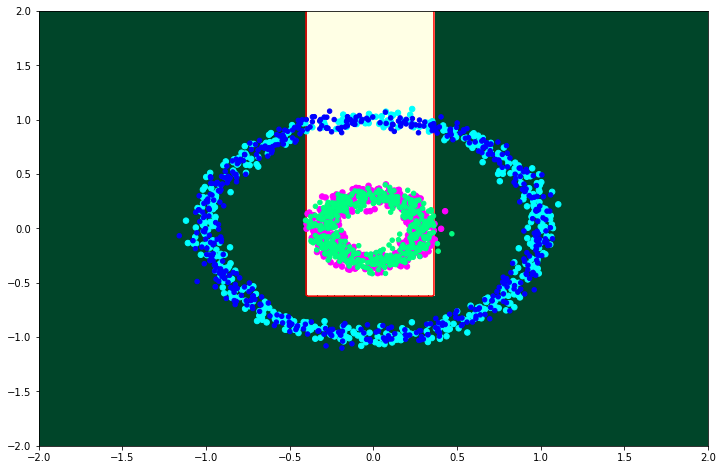

In [58]:
n_t=3
clf=sktr.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree')

Test Accuracy = 0.994
Max depth = 4


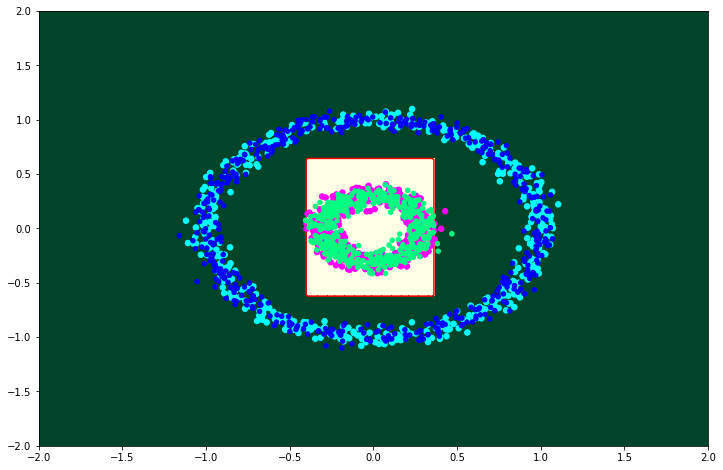

In [59]:
n_t=4
clf=sktr.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree')

---
### 1.f

#### PCA + Kernel Gaussiano

In [21]:
kpca = skdc.KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

---
### 1.g

#### Separación mediante frontera lineal

Test Accuracy = 1.0
Max depth = 1


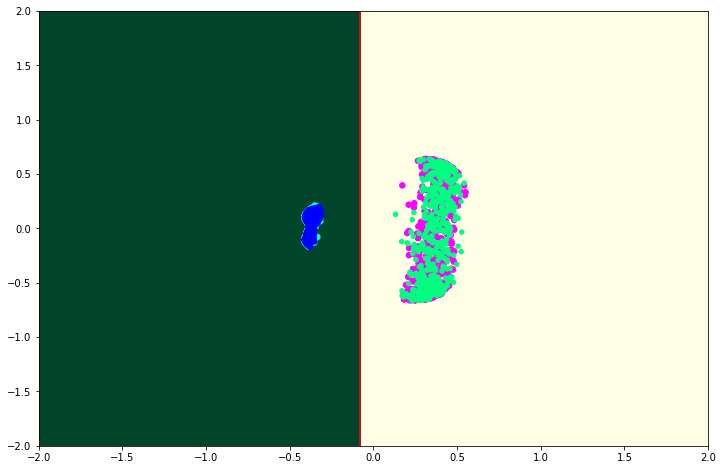

In [55]:
clf = sktr.DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(Xkpca_train,y_train)
acc_test = clf.score(Xkpca_test,y_test)
print("Test Accuracy = {}".format(acc_test))
print("Max depth = {}".format(clf.tree_.max_depth))
plot_classifier(clf, Xkpca_train, y_train, Xkpca_test, y_test, 'tree')

---

---
## 2.- Bike Sharing

---
### 2.a

#### Datos

In [23]:
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain, dfval, dftest])
df.describe()

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,5442.500000,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,3142.661849,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2721.250000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,5442.500000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,8163.750000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,10885.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [24]:
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
df.describe()

,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,5442.500000,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,3142.661849,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2721.250000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,5442.500000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,8163.750000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,10885.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


---
### 2.b

#### Arbol de Regresión

In [25]:
def eval_bikemodel(y_predict, y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

def plot_predictions(y_predict, y_true, model=''):
    plt.figure(figsize=(7,7))
    plt.plot(y_true, y_predict, '.')
    plt.plot((0,1000), (0,1000), 'r')
    plt.title('Predictions ' + model)
    plt.xlabel('real y')
    plt.ylabel('predicted y')
    plt.grid()
    plt.show()

     SCORE TEST = 0.7033880538
KAGG EVAL TRAIN = 0.0285162833
 KAGG EVAL TEST = 0.5742388006


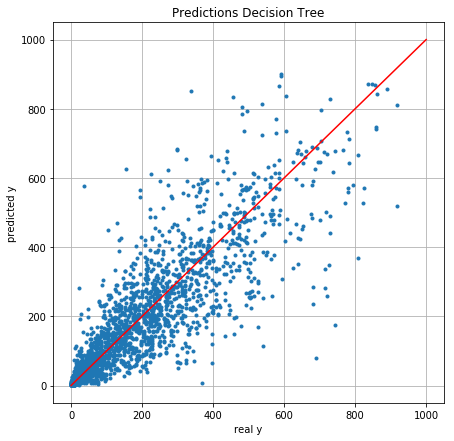

In [26]:
Xdf = df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf = df.loc[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = sktr.DecisionTreeRegressor(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print("     SCORE TEST = {:>.10f}".format(score_test))

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print("KAGG EVAL TRAIN = {:>.10f}".format(kagg_train))
print(" KAGG EVAL TEST = {:>.10f}".format(kagg_test))

plot_predictions(Y_test, Y_pred_test, model='Decision Tree')

---
### 2.c

#### _Tunning_ de Hiperparámetros

KAGG EVAL VAL = 0.5462190412


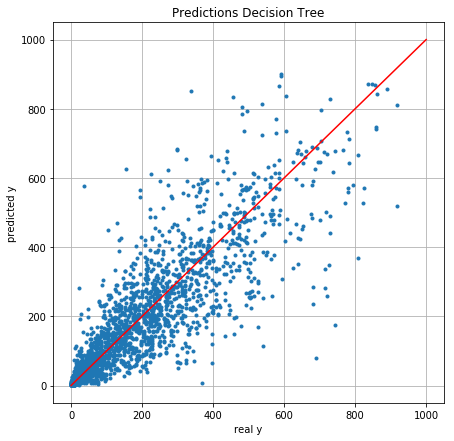

In [27]:
model = sktr.DecisionTreeRegressor(random_state=0, max_depth=20)
model.fit(X_train, Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val, Y_val)
print("KAGG EVAL VAL = {:>.10f}".format(kagg_val))

plot_predictions(Y_test, Y_pred_test, model='Decision Tree')

---
### 2.d

#### _Tunning_ de la Representación

In [28]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek # 0:lunes, 6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf = df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

---
### 2.e

#### SVM no lineal

In [29]:
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')

In [28]:
df = pd.concat([dftrain, dfval, dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])

Xdf = df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.loc[:,'count']

scalerX = skpp.StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

model = sksvm.SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

NameError: name 'dftrain' is not defined

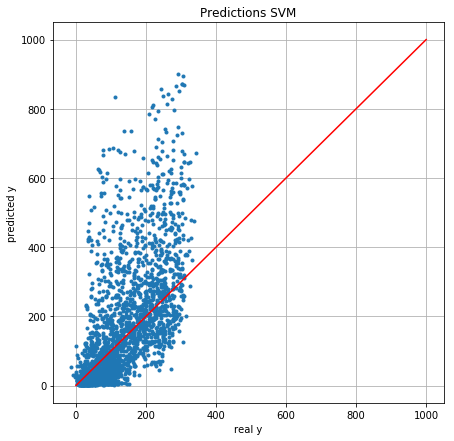

In [31]:
plot_predictions(Y_test, Y_pred_test, model='SVM')

---
### 2.f

#### _Tunning_ de Hiperparámetros

KAGG EVAL TRAIN = nan
  KAGG EVAL VAL = nan


/home/vlizana/u/machine-learning/v-temp/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


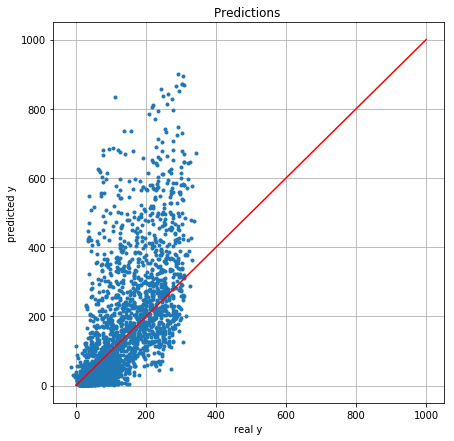

In [32]:
model = sksvm.SVR(C=1,epsilon=0.01)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print("KAGG EVAL TRAIN = {:>.10f}".format(kagg_train))
print("  KAGG EVAL VAL = {:>.10f}".format(kagg_val))
plot_predictions(Y_test, Y_pred_test)

---
### 2.g

#### _K-Folds_

In [33]:
kf = skms.KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = # define your model
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10

SyntaxError: invalid syntax (<ipython-input-33-2a8667a2640c>, line 4)

---
### 2.h

#### Ensamblado de dos Máquinas

In [ ]:
Ydf = df.loc[:,'count'] # demanda total
Ydf = df.loc[:,'registered'] # demanda registrada
Ydf = df.loc[:,'casual'] # demanda casual

---
### 2.i

#### Algoritmo Genético

In [ ]:
max_depth = 3
model = skens.RandomForestRegressor(n_estimators=10, max_depth=max_depth, random_state=0)

---

---
## 3.- Calidad de un Vino

---
### 3.a

#### Datos

In [46]:
df_3_red = pd.read_csv("winequality-red.csv",sep=";")
df_3_red['type'] = [1 for i in range(df_3_red.shape[0])]
df_3_white = pd.read_csv("winequality-white.csv",sep=";")
df_3_white['type'] = [0 for i in range(df_3_white.shape[0])]
df_3 = pd.concat([df_3_red,df_3_white], axis=0)

df_3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [32]:
df_3.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


---
### 3.b

#### Preparación de los Datos

In [50]:
df_3['good_quality'] = [1 if q > 5 else 0 for q in df_3.quality]
df_3_data = df_3.drop(['good_quality', 'quality'], axis=1)
df_3_target = df_3['good_quality']

X_train_3, X_test_3, y_train_3, y_test_3 = skms.train_test_split(df_3_data, df_3_target, test_size=0.25)

Se elimina también la columna `'quality'` ya que la utilizamos para la extracción de `'good_quality'`, si no la eliminamos el _learner_ podría simplemente aprender a fijarse si es mayor a 5 para obtener el _target_.

---

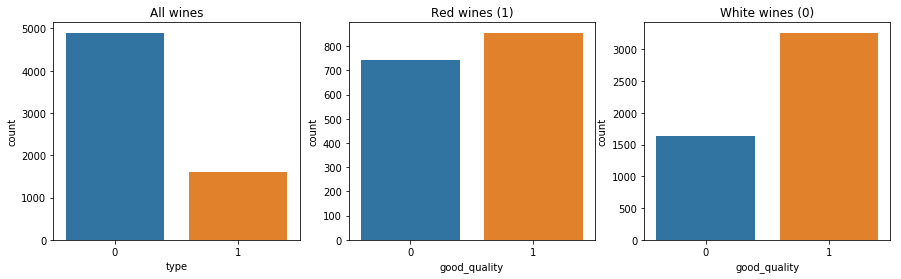

In [35]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(131)
ax1.set_title("All wines")
sbrn.countplot(x='type', data=df_3, ax=ax1)

ax2 = fig.add_subplot(132)
ax2.set_title("Red wines (1)")
sbrn.countplot(x='good_quality', data=df_3[df_3['type'] == 1], ax=ax2)

ax3 = fig.add_subplot(133)
ax3.set_title("White wines (0)")
sbrn.countplot(x='good_quality', data=df_3[df_3['type'] == 0], ax=ax3)

plt.show()

Podemos ver que las clases no están equi-representadas en cuanto a tipo de vino, y en el caso de vino blanco también existe un desbalance (aunque no tan relevante) en cuanto a calidad, lo que justifica utilizar el $F_1$-score.

---
### 3.c

#### Arbol de Clasificación

In [39]:
model = sktr.DecisionTreeClassifier()
model.fit(X_train_3, y_train_3)
y_pred_3 = model.predict(X_test_3)
f1_tree_3 = skmt.f1_score(y_test_3, y_pred_3)
print("F1-score Decision Tree: {:>.3}".format(f1_tree_3))

F1-score Decision Tree: 0.813


---
### 3.d

#### Random Forest

In [78]:
scores_md5 = []
total = 100
for n in range(total):
    model = skens.RandomForestClassifier(n_estimators=n+1, max_depth=5, n_jobs=-1)
    model.fit(X_train_3, y_train_3)
    y_pred_3 = model.predict(X_test_3)
    scores_md5.append(skmt.f1_score(y_test_3, y_pred_3))
    loading(n, total)

[===================================================================================================>] 100%

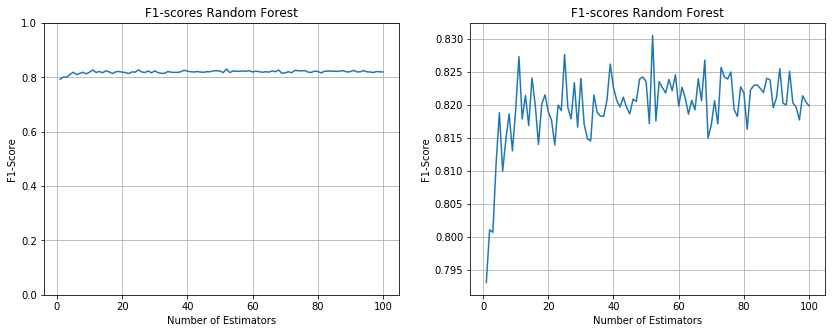

In [79]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,total+1), scores_md5)
ax1.grid()
ax1.set_ylim(0,1)
ax1.set_title('F1-scores Random Forest')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Score')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,total+1), scores_md5)
ax2.grid()
ax2.set_title('F1-scores Random Forest')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('F1-Score')

plt.show()

---

In [80]:
scores = []
total = 50
for n in range(total):
    model = skens.RandomForestClassifier(n_estimators=n+1, n_jobs=-1)
    model.fit(X_train_3, y_train_3)
    y_pred_3 = model.predict(X_test_3)
    scores.append(skmt.f1_score(y_test_3, y_pred_3))
    loading(n, total)

[=================================================>] 100%

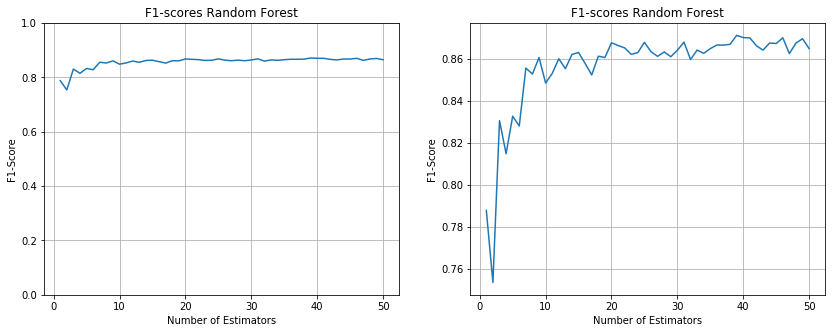

In [81]:
fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,total+1), scores)
ax1.grid()
ax1.set_ylim(0,1)
ax1.set_title('F1-scores Random Forest')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('F1-Score')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,total+1), scores)
ax2.grid()
ax2.set_title('F1-scores Random Forest')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('F1-Score')

plt.show()

En ninguno de los casos se aprecian mejoras significativas más allá de los 10 estimadores.

---
### 3.e

#### _AdaBoost_

In [ ]:
model = skens.AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)

---
### 3.f

#### Otra máquina

---
### 3.g

#### Importancia de los Atributos

---

---
## 4.- Lenguaje de Señas

---
### 4.a

#### Datos

In [ ]:
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    #you need to add Xval: x_v,y_v
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

In [ ]:
x_tr, x_v, x_t, y_tr, y_v, y_t = load_data()

---
### 4.b

#### Escalar los datos

---
### 4.c

#### Neural Network

In [ ]:
model = krms.Sequential()
model.add(krly.Dense(30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(krly.Dense(30, init='uniform', activation='relu'))
model.add(krly.Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=kropt.SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
validation_data=(x_v.values, sknpu.to_categorical(y_v)))

---
### 4.d

#### Matriz de confusión

---
### 4.e

#### SVM no lineal

---
### 4.f

#### Arbol de clasificación

---

---

---